In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
data = pd.read_csv('./data_siemens_gamesa_GCTAY.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [3]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2011-01-03,5,0.000000,0.255800,0.470360,1.6900
2011-01-04,6,0.000000,0.209000,0.322400,1.6900
2011-01-05,5,0.000000,0.298200,0.477660,1.6900
2011-01-06,3,0.000000,0.232667,0.391933,1.6900
2011-01-07,4,0.000000,0.138250,0.241975,1.6900
...,...,...,...,...,...
2021-03-26,95,0.009695,0.182453,0.331604,6.8900
2021-03-29,118,0.038805,0.164941,0.280736,6.9400
2021-03-30,129,0.021946,0.231884,0.430319,7.3225


# Import Data Normalized

In [4]:
data_normalized =  pd.read_csv('./data_siemens_gamesa_GCTAY_normalized.csv')

In [5]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2011-01-03,0.010076,0.000000,0.397514,0.654792,0.151872
1,2011-01-04,0.012594,0.000000,0.324786,0.508204,0.151872
2,2011-01-05,0.010076,0.000000,0.463403,0.662024,0.151872
3,2011-01-06,0.005038,0.000000,0.361564,0.577093,0.151872
4,2011-01-07,0.007557,0.000000,0.214841,0.428525,0.151872
...,...,...,...,...,...,...
2546,2021-03-26,0.236776,0.045307,0.283532,0.517323,0.708021
2547,2021-03-29,0.294710,0.181351,0.256318,0.466927,0.713369
2548,2021-03-30,0.322418,0.102561,0.360348,0.615123,0.754278
2549,2021-03-31,0.322418,0.108973,0.321907,0.513321,0.798930


# Lag Analysis

In [14]:
max_lag = 1000

In [15]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.set_ylim(0,1)
    ax1.grid(True)
    plt.show()

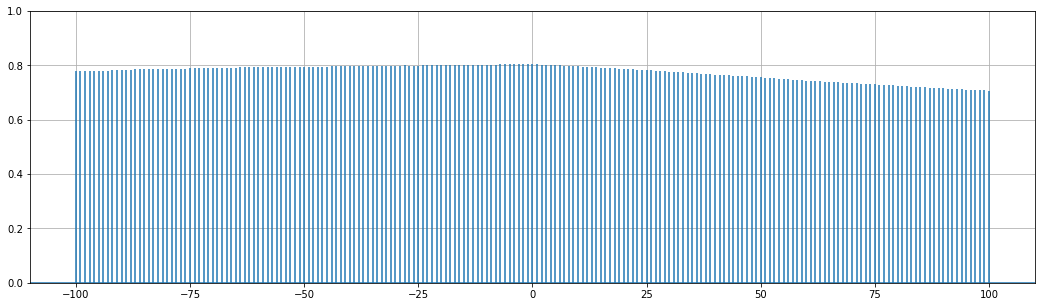

In [8]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

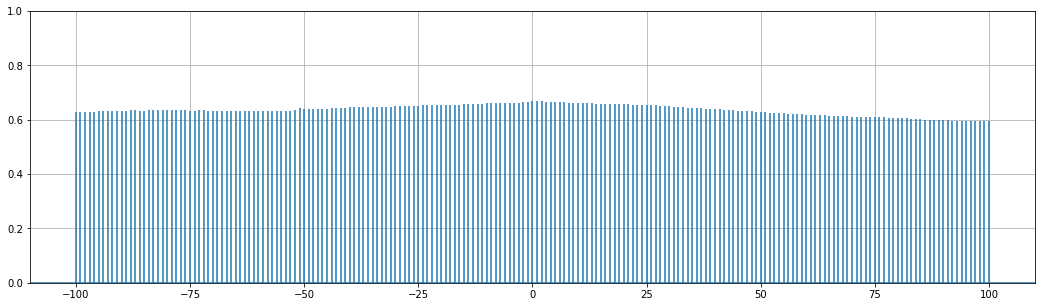

In [9]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

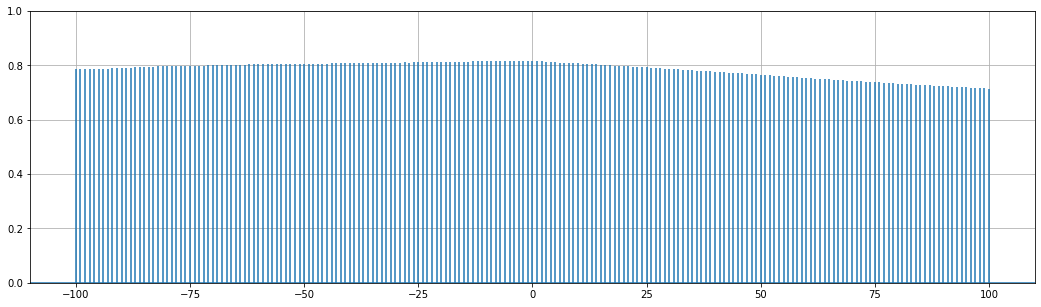

In [10]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

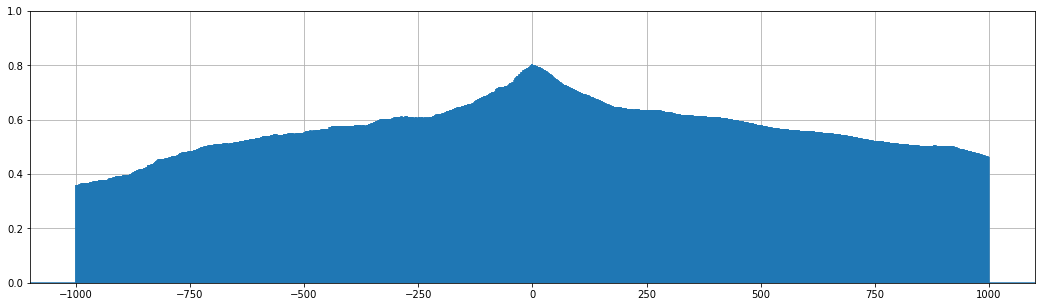

In [16]:
series_1 = data['daily_tweets'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [11]:
data.columns

Index(['daily_tweets', 'neg_sentiment', 'pos_sentiment', 'compound_sentiment',
       'closing_price'],
      dtype='object')

In [12]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1
ssr based chi2 test:   chi2=2.1152  , p=0.1458  , df=1
likelihood ratio test: chi2=2.1143  , p=0.1459  , df=1
parameter F test:         F=2.1127  , p=0.1462  , df_denom=2547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2
ssr based chi2 test:   chi2=4.3029  , p=0.1163  , df=2
likelihood ratio test: chi2=4.2993  , p=0.1165  , df=2
parameter F test:         F=2.1472  , p=0.1170  , df_denom=2544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3
ssr based chi2 test:   chi2=4.8767  , p=0.1811  , df=3
likelihood ratio test: chi2=4.8720  , p=0.1814  , df=3
parameter F test:         F=1.6211  , p=0.1824  , df_denom=2541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3589  , p=0.

{1: ({'ssr_ftest': (2.11273287536082, 0.14620143723121184, 2547.0, 1),
   'ssr_chi2test': (2.115221371091516, 0.14584096395457108, 1),
   'lrtest': (2.114344569366949, 0.1459245164222008, 1),
   'params_ftest': (2.112732875360545, 0.14620143723125364, 2547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.147237613968313, 0.11701802494672243, 2544.0, 2),
   'ssr_chi2test': (4.302915627362602, 0.11631446929178714, 2),
   'lrtest': (4.2992878767527145, 0.11652564069664263, 2),
   'params_ftest': (2.1472376139684286, 0.11701802494672243, 2544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.621087020033447, 0.18237378964694229, 2541.0, 3),
   'ssr_chi2test': (4.876658473489047, 0.18105484129008872, 3),
   'lrtest': (4.871997661652131, 0.18141366586296956, 3),
   'params_ftest': (1.6210870200335326, 0.1823737896469113, 2541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [13]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=62.4366 , p=0.0000  , df_denom=2547, df_num=1
ssr based chi2 test:   chi2=62.5102 , p=0.0000  , df=1
likelihood ratio test: chi2=61.7563 , p=0.0000  , df=1
parameter F test:         F=62.4366 , p=0.0000  , df_denom=2547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.3155 , p=0.0000  , df_denom=2544, df_num=2
ssr based chi2 test:   chi2=48.7266 , p=0.0000  , df=2
likelihood ratio test: chi2=48.2667 , p=0.0000  , df=2
parameter F test:         F=24.3155 , p=0.0000  , df_denom=2544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.1221 , p=0.0000  , df_denom=2541, df_num=3
ssr based chi2 test:   chi2=39.4747 , p=0.0000  , df=3
likelihood ratio test: chi2=39.1721 , p=0.0000  , df=3
parameter F test:         F=13.1221 , p=0.0000  , df_denom=2541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.8354  , p=0.

{1: ({'ssr_ftest': (62.43663441421565, 4.058009016547337e-15, 2547.0, 1),
   'ssr_chi2test': (62.51017579750684, 2.6507150170748248e-15, 1),
   'lrtest': (61.756290545548836, 3.8870775585111454e-15, 1),
   'params_ftest': (62.436634414215554, 4.058009016548001e-15, 2547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (24.315488763419843, 3.464035141674665e-11, 2544.0, 2),
   'ssr_chi2test': (48.72655727826822, 2.6252007880404362e-11, 2),
   'lrtest': (48.26668145529766, 3.303872598983745e-11, 2),
   'params_ftest': (24.315488763419523, 3.464035141675613e-11, 2544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.122089145005619, 1.6756681125335214e-08, 2541.0, 3),
   'ssr_chi2test': (39.47471445274417, 1.3768465903337392e-08, 3),
   'lrtest': (39.17205673891294, 1.5959330603071927e-08, 3),
   'params_ftest': (13.122089145002178, 1.675668112541439e-08, 2541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.

In [14]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=165.0847, p=0.0000  , df_denom=2547, df_num=1
ssr based chi2 test:   chi2=165.2792, p=0.0000  , df=1
likelihood ratio test: chi2=160.1436, p=0.0000  , df=1
parameter F test:         F=165.0847, p=0.0000  , df_denom=2547, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=60.1786 , p=0.0000  , df_denom=2544, df_num=2
ssr based chi2 test:   chi2=120.5937, p=0.0000  , df=2
likelihood ratio test: chi2=117.8280, p=0.0000  , df=2
parameter F test:         F=60.1786 , p=0.0000  , df_denom=2544, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.1308 , p=0.0000  , df_denom=2541, df_num=3
ssr based chi2 test:   chi2=93.6498 , p=0.0000  , df=3
likelihood ratio test: chi2=91.9698 , p=0.0000  , df=3
parameter F test:         F=31.1308 , p=0.0000  , df_denom=2541, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=18.2731 , p=0.

{1: ({'ssr_ftest': (165.08472071401525, 1.1756040459121518e-36, 2547.0, 1),
   'ssr_chi2test': (165.27916679259476, 7.949263884646977e-38, 1),
   'lrtest': (160.14360262528498, 1.052623298082332e-36, 1),
   'params_ftest': (165.08472071401556, 1.175604045911968e-36, 2547.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (60.1785924154349, 2.9118475581503436e-26, 2544.0, 2),
   'ssr_chi2test': (120.59373590168518, 6.507332122396699e-27, 2),
   'lrtest': (117.82797515984566, 2.594061613492622e-26, 2),
   'params_ftest': (60.178592415435304, 2.911847558149061e-26, 2544.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (31.130831662851417, 9.286178533316302e-20, 2541.0, 3),
   'ssr_chi2test': (93.6497745890737, 3.6013771332696124e-20, 3),
   'lrtest': (91.96980236548188, 8.268396340046655e-20, 3),
   'params_ftest': (31.130831662848916, 9.286178533348567e-20, 2541.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 